# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
#df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx')

In [3]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000, dtype={'Owner Zip Code':str})

In [4]:
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

* *Tip: there's an option with `.read_csv` to only read in a certain number of rows*

In [5]:
#number of raws in the data
df.shape[0]

30000

In [6]:
#data types of each columns
df.dtypes

Owner Zip Code                    object
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

In [7]:
#modify column names
df.columns = df.columns.str.lower().str.replace(' ','_')

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

----
<font color="blue"><b>**my answer**</b>:</font><br>
Each row is a registered pet in New York City.<br><br>
`Owner Zip Code` is a zip code of the owner's address.<br>
`Vaccinated` is whether the pet is vaccinated or not. Shown as <YES/NO><br>
----

In [8]:
#check column names
df.columns

Index(['owner_zip_code', 'animal_name', 'animal_gender', 'primary_breed',
       'secondary_breed', 'animal_dominant_color', 'animal_secondary_color',
       'animal_third_color', 'animal_birth', 'spayed_or_neut',
       'guard_or_trained', 'vaccinated', 'application_date',
       'license_issued_date', 'license_expired_date'],
      dtype='object')

In [9]:
#check data in Vaccinated column
df.vaccinated.unique()

array(['Yes', 'No'], dtype=object)

In [10]:
#check data in Owner Zip Code
df['owner_zip_code'].unique()

array(['10024', '10461', '10013', '10025', '10035', '10465', '10028',
       '11232', '10022', '11209', '11215', '10312', '11220', '10002',
       '10308', '11201', '11218', '11208', '10003', '11238', '10463',
       '10011', '11231', '10305', '11361', '10021', '11236', '10471',
       '10023', '11224', '11104', '11379', '10012', '10029', '10467',
       '11374', '10038', '10451', '10309', '10034', '10065', '10031',
       '11106', '10016', '11217', '11435', '10001', '10128', '11211',
       '11230', '11101', '10475', '10039', '11375', '11385', '11365',
       '10306', '11216', '10462', '10036', '10019', '10458', '11228',
       '11221', '11354', '11214', '10307', '10027', '10314', '11102',
       '10301', '11237', '11234', '11427', '11205', '11355', '10017',
       '11222', '11364', '11206', '11249', '11377', '10466', '10310',
       '10473', '10026', '10033', '10014', '11372', '11694', '10469',
       '10040', '10032', '11358', '10044', '10009', '11414', '10456',
       '11109', '114

In [11]:
#add '0' if zip code is only 4 digits
df.owner_zip_code = df.owner_zip_code.apply(lambda x: '0'+ str(x) if len(x)==4 else x)

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

---
<font color="blue">**my questions**:</font><br>
<li>What percentage of the pets are vaccinated?</li>
<li>What percentage of the pets are guard or trained?</li>
<li>What percentage of the pets are spayed or neut?</li>
<li>What are the popular breeds?</li>
<li>Is license issued without delay for all the owners?</li>
<li>If there are pets with shorter duration of licence, why is it? Are there any difference by vaccination status or training status etc?</li><br>

---

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [12]:
#top 10 breed
df.primary_breed.value_counts().head(10)

Unknown                                 4777
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Name: primary_breed, dtype: int64

In [13]:
#replace 'Unknown'
df.primary_breed = df.primary_breed.replace('Unknown', np.nan)

In [14]:
#top 10 breed excluding unknown
df.primary_breed.value_counts().head(10)

Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: primary_breed, dtype: int64

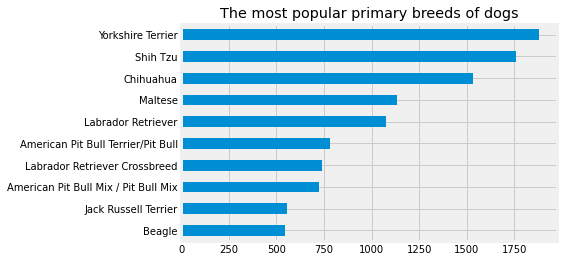

In [15]:
#top 10 graph
df.primary_breed.value_counts().head(10).sort_values().plot(kind='barh')
plt.title('The most popular primary breeds of dogs')
plt.show()

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

* *Tip: Maybe you want to go back to your `.read_csv` and use `na_values=`? Maybe not? Up to you!*

In [16]:
#I have done it with 3.1

## What are the most popular dog names?

In [17]:
#popular names
df.animal_name.value_counts().head(10)

UNKNOWN    203
Max        202
Unknown    197
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Name: animal_name, dtype: int64

In [18]:
#replace names "Unknown" with np.nan
df.loc[df.animal_name.str.contains('unknown',case=False, na=False),'animal_name'] = np.nan

In [19]:
#popular names excluding unknown
df.animal_name.value_counts().head(10)

Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: animal_name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [20]:
# Do any dogs have your name?----> No
df[df.animal_name.str.contains('mio', case=False, na=False)]

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date


In [21]:
#cleaning data
#strip
df.animal_name = df.animal_name.str.strip()

In [22]:
#How many dogs are named "Max?
#check Max names
df[df.animal_name.str.contains('Max', case=False, na=False)].animal_name.unique()

array(['Max', 'Maximus', 'Maxx  AKA Carter', 'Maxi', 'MAX', 'max',
       'Max Marder Klein', 'MAXINE', 'Maxwell', 'Maxx',
       'Maximilian Court Krsnak', 'MAXIMUS', 'Max Fincher', 'MAX PEPPER',
       'Maximillion Alberich', 'Maxi Rodriguez', 'Maximus Mushyakov',
       'Maximilian', 'max torres', 'Max Bailey', 'Maxwell Miller',
       'Max Buddy Boy', 'Max Troni', 'Maxemillian Pegases', 'Maxy',
       'Blue Maxius', 'Max Di Marco', 'Maximus Von Warrior - Lemon',
       'Max Pila', 'Maxflower', 'Max Ortiz', 'Maximo', 'Maxxie',
       'Max Whang', 'MAXWELL', 'MAXIE', 'Buddy Max', 'Max Caminiti',
       'Maximillia', 'Maximillion', 'MAXAILLION', 'BROWNIE MAXIMILIANO',
       'MAX POWER', 'Max Rodriguez', 'Max Feldman', 'MAX LEAR',
       'Max Whitfield', 'MAXIMUS GARCIA', 'Maxine',
       'Maximus Prime Berrios', 'Maximus D.', 'MAXWELL ED', 'Maxie',
       'maximillion', 'maximus', 'Max Brewer', 'Billy Max', 'maxi',
       'MAXX', 'Max Garcia', 'Lucky Max', 'MAX A MILL', 'Max Suarez',

In [23]:
#How many dogs are named "Max"
#count dogs with all names with "max" in it
df.animal_name.str.contains('Max', case=False, na=False).sum()

504

In [24]:
#Only "Max (with either upper/lowercase)"
df.animal_name.str.contains('^max$', case=False, na=False).sum()

297

In [25]:
#all the Maxwell names
df.animal_name.str.contains('maxwell', case=False, na=False).sum()

25

In [26]:
#Only "Maxwell(with either upper/lowercase)"
df.animal_name.str.contains('^maxwell$', case=False, na=False).sum()

16

## What percentage of dogs are guard dogs?

In [27]:
#check data
df.guard_or_trained.unique()

array(['No', nan, 'Yes'], dtype=object)

In [28]:
#percentage of guard dogs/non-guard dogs
df.guard_or_trained.value_counts(normalize=True)

No     0.999143
Yes    0.000857
Name: guard_or_trained, dtype: float64

In [29]:
percentage = df.guard_or_trained.value_counts(normalize=True)['Yes'] *100
print(f"{percentage:.2f}% of dogs with training data are guard dogs.")

0.09% of dogs with training data are guard dogs.


In [30]:
# percentage including na values
df.guard_or_trained.value_counts(dropna=False, normalize=True) *100

No     66.030000
NaN    33.913333
Yes     0.056667
Name: guard_or_trained, dtype: float64

In [31]:
percentage = df.guard_or_trained.value_counts(normalize=True, dropna=False)['Yes'] *100
print(f"{percentage:.2f}% of all dogs are guard dogs.")

0.06% of all dogs are guard dogs.


## What are the actual numbers?

In [32]:
df.guard_or_trained.value_counts()

No     19809
Yes       17
Name: guard_or_trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`. Think about missing data!

In [33]:
# if you add that up, is it the same as your number of rows?
#add numbers up
#It's NOT the same as the number of all the rows (30000)
df.guard_or_trained.value_counts().sum()

19826

In [34]:
#Where are the other dogs????
#How can we find them??????
#---->by filtering na data
df[df.guard_or_trained.isna()].head()

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,NaN,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,NaN,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12
11,11232,muneca,F,Beagle,NaN,White,Black,Brown,2013-05-01,Yes,NaN,Yes,2014-09-13 00:58:36.603,2014-09-13,2019-09-13


## Maybe fill in all of those empty "Guard or Trained" columns with "No"? Or as `NaN`? 

Can we make an assumption either way? Then check your result with another `.value_counts()`

In [35]:
#counting NaN as "No"
df.guard_or_trained.fillna('No').value_counts(normalize=True)

No     0.999433
Yes    0.000567
Name: guard_or_trained, dtype: float64

## What are the top dog breeds for guard dogs? 

In [36]:
#the top dog breeds for guard dogs
df.query("guard_or_trained=='Yes'").primary_breed.value_counts().head(5)

German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Name: primary_breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [37]:
df['year'] = df.animal_birth.dt.year

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [38]:
#calculate age and assign it as a new column
df['age'] = 2022 - df.year

In [39]:
#average age of dogs
print(f"Dogs are {df.age.median():.1f} years old on average.")

Dogs are 12.0 years old on average.


# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [40]:
#read zipcode data
zipcode = pd.read_csv('zipcodes-neighborhoods.csv', dtype=str)

In [41]:
#check data
zipcode.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [42]:
#check data types
zipcode.dtypes

neighborhood    object
zip             object
borough         object
dtype: object

In [43]:
zipcode.zip = zipcode.zip.apply(lambda x: '0' + x if len(x)==4 else x)

In [44]:
#check data in borough column
zipcode.borough.unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

In [45]:
#check data in neighborhood column
zipcode.neighborhood.unique()

array(['Central Bronx', 'Bronx Park and Fordham',
       'High Bridge and Morrisania', 'Hunts Point and Mott Haven',
       'Kingsbridge and Riverdale', 'Northeast Bronx', 'Southeast Bronx',
       'Central Brooklyn', 'Southwest Brooklyn', 'Borough Park',
       'Canarsie and Flatlands', 'Southern Brooklyn',
       'Northwest Brooklyn', 'Flatbush', 'East New York and New Lots',
       'Greenpoint', 'Sunset Park', 'Bushwick and Williamsburg',
       'Central Harlem', 'Chelsea and Clinton', 'East Harlem',
       'Gramercy Park and Murray Hill', 'Greenwich Village and Soho',
       'Lower Manhattan', 'Lower East Side', 'Upper East Side',
       'Upper West Side', 'Inwood and Washington Heights',
       'Northeast Queens', 'North Queens', 'Central Queens', 'Jamaica',
       'Northwest Queens', 'West Central Queens', 'Rockaways',
       'Southeast Queens', 'Southwest Queens', 'West Queens',
       'Port Richmond', 'South Shore', 'Stapleton and St. George',
       'Mid-Island'], dtype=object

In [46]:
#merge data
df = df.merge(zipcode, left_on='owner_zip_code', right_on='zip')

In [47]:
#check merged data
df.head()

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,14,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,11,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,11,Upper West Side,10024,Manhattan
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,15,Upper West Side,10024,Manhattan


In [48]:
#Which neighborhood does each dog live in?

df.neighborhood.value_counts()

Upper West Side                  2000
Upper East Side                  1851
Northwest Brooklyn               1716
Chelsea and Clinton              1533
South Shore                      1375
Lower East Side                  1149
West Queens                      1141
Gramercy Park and Murray Hill    1002
West Central Queens               984
Southeast Bronx                   925
Northwest Queens                  850
Southern Brooklyn                 839
Southwest Brooklyn                811
North Queens                      766
Inwood and Washington Heights     752
Greenwich Village and Soho        740
Central Brooklyn                  715
Southwest Queens                  683
Borough Park                      639
Bushwick and Williamsburg         613
Stapleton and St. George          562
Greenpoint                        538
Central Harlem                    534
Canarsie and Flatlands            531
Mid-Island                        486
East Harlem                       482
Flatbush    

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

You'll want to do these separately, and filter for each.

In [49]:
#What is the most popular dog name in all parts of the Bronx?
df.query("borough=='Bronx'").animal_name.value_counts().head(1)

Rocky    23
Name: animal_name, dtype: int64

In [50]:
#How about Brooklyn? 
df.query("borough=='Brooklyn'").animal_name.value_counts().head(1)

Max    52
Name: animal_name, dtype: int64

In [51]:
#The Upper East Side?
df.query("neighborhood=='Upper East Side'").animal_name.value_counts().head(1)

Charlie    19
Name: animal_name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

* *Tip: There are a few ways to do this, and some are awful (see the "top 5 breeds in each borough" question below).*

In [52]:
breed_by_area = pd.crosstab(df.primary_breed, df.neighborhood).rank(method='min', ascending=False)

In [53]:
for neighborhood in breed_by_area.columns:
    dog_breed = breed_by_area[breed_by_area[neighborhood]==1].index[0]
    print(neighborhood, ": ", dog_breed)

Borough Park :  Yorkshire Terrier
Bronx Park and Fordham :  Yorkshire Terrier
Bushwick and Williamsburg :  Yorkshire Terrier
Canarsie and Flatlands :  Shih Tzu
Central Bronx :  Yorkshire Terrier
Central Brooklyn :  Shih Tzu
Central Harlem :  Chihuahua
Central Queens :  Yorkshire Terrier
Chelsea and Clinton :  Chihuahua
East Harlem :  Yorkshire Terrier
East New York and New Lots :  Yorkshire Terrier
Flatbush :  Shih Tzu
Gramercy Park and Murray Hill :  Yorkshire Terrier
Greenpoint :  Chihuahua
Greenwich Village and Soho :  Labrador Retriever
High Bridge and Morrisania :  Shih Tzu
Hunts Point and Mott Haven :  Chihuahua
Inwood and Washington Heights :  Chihuahua
Jamaica :  Yorkshire Terrier
Kingsbridge and Riverdale :  Shih Tzu
Lower East Side :  Chihuahua
Lower Manhattan :  Shih Tzu
Mid-Island :  Yorkshire Terrier
North Queens :  Maltese
Northeast Bronx :  Yorkshire Terrier
Northeast Queens :  Maltese
Northwest Brooklyn :  Labrador Retriever
Northwest Queens :  Chihuahua
Port Richmond :

## What breed of dogs are the least likely to be spayed? Male or female?

* *Tip: This has a handful of interpretations, and some are easier than others. Feel free to skip it if you can't figure it out to your satisfaction.*

In [54]:
#check how data looks like
df.spayed_or_neut.unique()

array(['Yes', 'No'], dtype=object)

In [76]:
#What breed of dogs are the least likely to be spayed?
spayed_by_breed = df.groupby('primary_breed').spayed_or_neut.value_counts(normalize=True).unstack()

In [77]:
spayed_by_breed.sort_values(by='Yes').head(5)

spayed_or_neut,No,Yes
primary_breed,,
Cardigan Welsh Corgi,0.666667,0.333333
Greater Swiss Mountain Dog,0.666667,0.333333
Lagotto Romagnolo,0.666667,0.333333
American Bully,0.647059,0.352941
Morkie,0.606061,0.393939


In [94]:
#Male or Female?
spayed_by_gender = pd.crosstab(df.animal_gender, df.spayed_or_neut)
spayed_by_gender_pct = spayed_by_gender.div(spayed_by_gender.sum(axis=1), axis=0).sort_values(by='Yes')

#-->Male dogs have lower percentage of getting spayed
spayed_by_gender_pct

spayed_or_neut,No,Yes
animal_gender,,
M,0.208677,0.791323
F,0.142435,0.857565
,0.000000,1.000000


## Make a new column called `monochrome` that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [201]:
#columns with data for colors 
color_col = df.columns[df.columns.str.contains('color')]

In [202]:
#change color names to lower case
df[color_col] = df[color_col].applymap(lambda x: x.lower() if type(x)==str else x)

In [203]:
#list of colors to include
monocolors = ['black','white','gray', np.nan]

In [204]:
#assign a monochrome column
df['monochrome'] = df[color_col].isin(monocolors).sum(axis=1)==3

In [205]:
#change momochrome column to False for rows without color data
df.loc[df[color_col].isnull().sum(axis=1)==3, 'monochrome'] = False

In [206]:
#How many animals are monochrome
print(f"{df.monochrome.sum()} are monochrome.")

8171 are monochrome.


## How many dogs are in each borough? Plot it in a graph.

In [207]:
#How many dogs are in each borough?
df.borough.value_counts()

Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: borough, dtype: int64

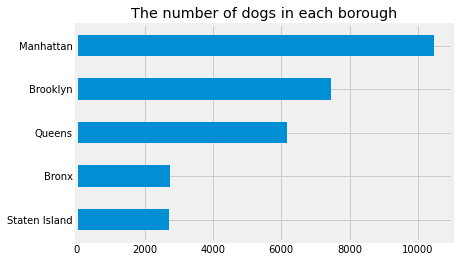

In [208]:
#graph
df.borough.value_counts().sort_values().plot(kind="barh")
plt.title("The number of dogs in each borough")
plt.show()

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [209]:
#population data
boro_population = pd.read_csv('boro_population.csv')
boro_population = boro_population.set_index('borough')

In [210]:
#add dog counts
boro_population['dogs'] = df.borough.value_counts()

In [211]:
#calculate per capita dogs
boro_population['per_capita_dogs'] = boro_population.dogs / boro_population.population

In [212]:
#sort values
boro_population = boro_population.sort_values(by='per_capita_dogs', ascending=False)

In [213]:
boro_population

,population,area_sqmi,dogs,per_capita_dogs
borough,,,,
Manhattan,1644518,23,10478,0.006371
Staten Island,474558,59,2727,0.005746
Brooklyn,2636735,71,7466,0.002832
Queens,2339150,109,6154,0.002631
Bronx,1455444,42,2748,0.001888


In [216]:
print(f"{boro_population.index[0]} is borough with the highest number of dogs per capita.")

Manhattan is borough with the highest number of dogs per capita.


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [245]:
breed_by_borough = pd.crosstab(df.primary_breed, df.borough)

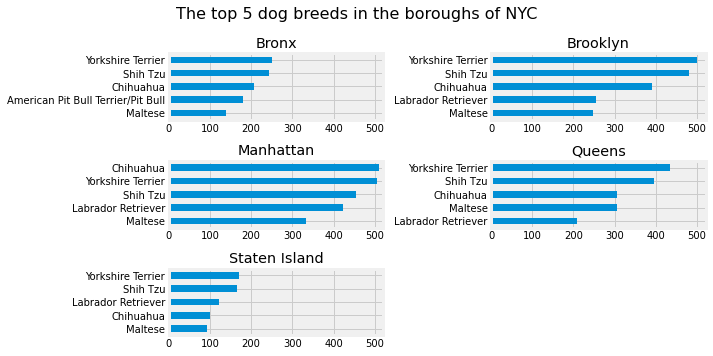

In [265]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('The top 5 dog breeds in the boroughs of NYC', fontsize=16)

xlim = breed_by_borough.max().max() +10

i = 1
for borough in breed_by_borough.columns:
    source = breed_by_borough.nlargest(5, borough)[borough]

    ax = fig.add_subplot(3, 2, i)
    ax = source.rename_axis('').sort_values().plot(kind="barh")
    ax.set_xlim(0, xlim)
    ax.set_title(f"{borough}")
    i+=1

fig.tight_layout()
plt.show()